In [1]:


############################
### Assignment 4


### 1

growth.height <- read.table("growthheight.txt", sep="\t", dec=".", header=TRUE)
attach(growth.height)

Y <- cbind(Y10, Y11, Y12, Y13, Y14, Y15, Y16, Y17, Y18)
t <- c(10, 11, 12, 13, 14, 15, 16, 17, 18)
T <- cbind(rep(1, 9), t, t^2, t^3)


### a)

Y.star <- Y %*% T %*% solve(t(T) %*% T)
growth.model <- lm(Y.star ~ factor(gender) - 1)
summary(growth.model)
Theta <- coef(growth.model)
Theta

#                                     t                      
# factor(gender)boy  295.32765 -45.99102  4.151625 -0.10851679
# factor(gender)girl -76.29141  37.64654 -1.916863  0.03185559

Response Y1 :

Call:
lm(formula = Y1 ~ factor(gender) - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-348.42 -103.76   -8.71   77.94  397.80 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
factor(gender)boy    295.33      22.14  13.340  < 2e-16 ***
factor(gender)girl   -76.29      18.81  -4.055 0.000106 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 138.3 on 91 degrees of freedom
Multiple R-squared:  0.6811,	Adjusted R-squared:  0.6741 
F-statistic: 97.19 on 2 and 91 DF,  p-value: < 2.2e-16


Response t :

Call:
lm(formula = t ~ factor(gender) - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.879 -17.405   3.565  25.654  75.043 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
factor(gender)boy   -45.991      5.003  -9.192 1.25e-14 ***
factor(gender)girl   37.647      4.252   8.854 6.39e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,,t,,
factor(gender)boy,295.32765,-45.99102,4.151625,-0.10851679
factor(gender)girl,-76.29141,37.64654,-1.916863,0.03185559


In [2]:
### b)

t19 <- c(1, 19, 19^2, 19^3)
xf <- t(cbind(0, 1))
BP <- t19 %*% t(Theta) %*% xf

# [1,] 165.5028


132.5153
139.5935
144.9964
149.2186
152.4613
155.4328
157.3289
157.9715
157.7758


148.1712
156.9662
163.9741
169.0823
172.4722
173.8175
174.3047
174.4942
174.3532


134.2085
138.6188
144.2300
150.6933
157.3655
164.1101
169.2829
171.8655
171.4291


149.9178
156.0555
163.2747
170.6220
177.4381
182.5575
186.3222
188.4484
188.0626


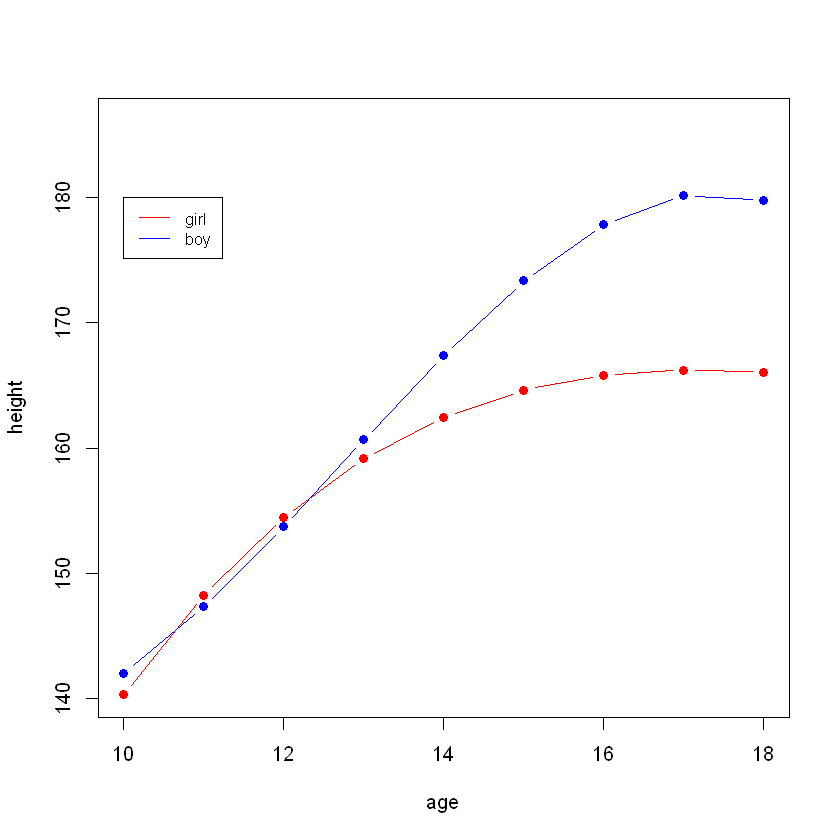

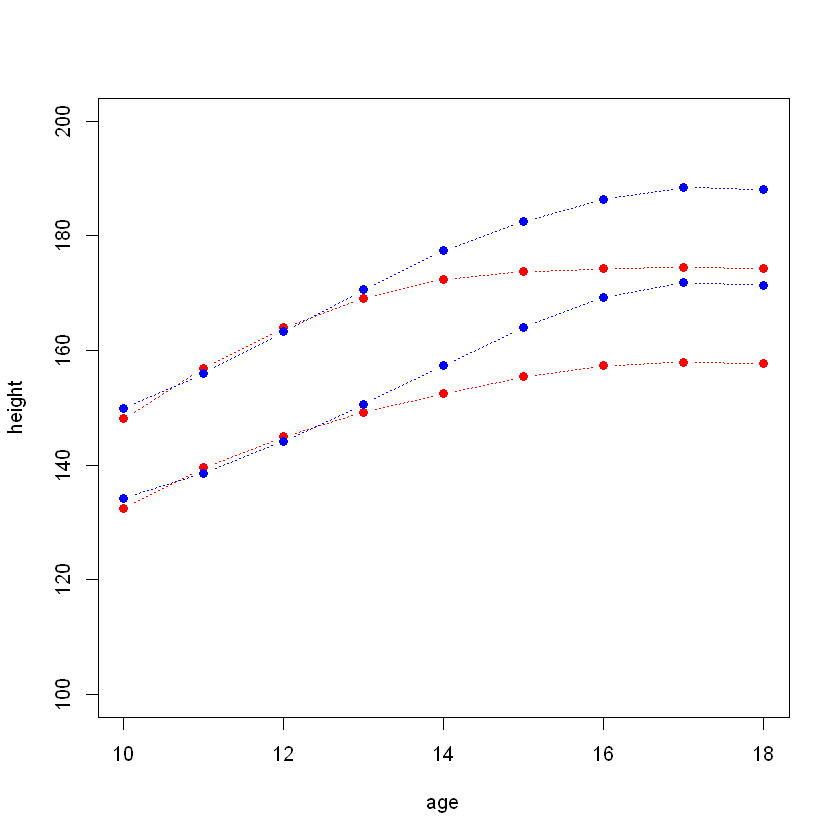

In [3]:
### c)

# for girl
xf <- t(cbind(0, 1))
BP.G <- T%*%t(Theta)%*%xf

#       [,1]
# [1,] 140.3433
# [2,] 148.2799
# [3,] 154.4852
# [4,] 159.1505
# [5,] 162.4667
# [6,] 164.6251
# [7,] 165.8168
# [8,] 166.2329
# [9,] 166.0645

# for boy
xf <- t(cbind(1, 0))
BP.B <- T%*%t(Theta)%*%xf

# 
#       [,1]
# [1,] 142.0631
# [2,] 147.3372
# [3,] 153.7524
# [4,] 160.6576
# [5,] 167.4018
# [6,] 173.3338
# [7,] 177.8026
# [8,] 180.1569
# [9,] 179.7459


plot(t, c(BP.G[-9], BP.G[9]+20), type = "n", xlab = "age", ylab = "height")
lines(t, BP.G, col="red", type = "b", pch=19)
lines(t, BP.B, col="blue", type = "b", pch=19)
legend(10, 180, legend = c("girl", "boy"), col = c("red", "blue"), lty = 1, cex=0.8)

# prediction intervals
x1<-t(cbind(0,1))  # girls
x2<-t(cbind(1,0))  # boys

X<-model.matrix(growth.model)
E <- Y - X %*% Theta %*% t(T)
Sigma<-t(E)%*%E/growth.model$df

PT <- T %*% solve(t(T) %*% T) %*% t(T)
cov.error1<-Sigma+(as.numeric(t(x1)%*%solve(t(X)%*%X)%*%x1)*PT%*%Sigma%*%PT)
cov.error2<-Sigma+(as.numeric(t(x2)%*%solve(t(X)%*%X)%*%x2)*PT%*%Sigma%*%PT)

# prediction intervals for girls
lower.bound1 <- BP.G - qnorm(0.9) * diag(cov.error1)^0.5
upper.bound1 <- BP.G + qnorm(0.9) * diag(cov.error1)^0.5
lower.bound1
#         [,1]
# [1,] 132.5153
# [2,] 139.5935
# [3,] 144.9964
# [4,] 149.2186
# [5,] 152.4613
# [6,] 155.4328
# [7,] 157.3289
# [8,] 157.9715
# [9,] 157.7758

upper.bound1
#         [,1]
# [1,] 148.1712
# [2,] 156.9662
# [3,] 163.9741
# [4,] 169.0823
# [5,] 172.4722
# [6,] 173.8175
# [7,] 174.3047
# [8,] 174.4942
# [9,] 174.3532

# # prediction intervals for boys
lower.bound2<-BP.B-qnorm(0.9)*diag(cov.error2)^0.5
upper.bound2<-BP.B+qnorm(0.9)*diag(cov.error2)^0.5

lower.bound2
#       [,1]
# [1,] 134.2085
# [2,] 138.6188
# [3,] 144.2300
# [4,] 150.6933
# [5,] 157.3655
# [6,] 164.1101
# [7,] 169.2829
# [8,] 171.8655
# [9,] 171.4291

upper.bound2
#       [,1]
# [1,] 149.9178
# [2,] 156.0555
# [3,] 163.2747
# [4,] 170.6220
# [5,] 177.4381
# [6,] 182.5575
# [7,] 186.3222
# [8,] 188.4484
# [9,] 188.0626

plot(c(10, 18), c(100, 200), type = "n", xlab = "age", ylab = "height")
lines(t, lower.bound1, col="red", lty=3, type = "b", pch=19)
lines(t, upper.bound1, col="red", lty=3, type = "b", pch=19)
lines(t, lower.bound2, col="blue", lty=3, type = "b", pch=19)
lines(t, upper.bound2, col="blue", lty=3, type = "b", pch=19)


In [4]:
### d)

model.H1 <- growth.model
summary(model.H1)

model.H0 <- lm(Y.star~1)
summary(model.H0)
coef(model.H0)

test <- anova(model.H0, model.H1) 

test$`approx F`[2] # value of test statistic 
# [1] 78.61024

test$`Pr(>F)`[2] # p-value
# 3.15561e-28

Response Y1 :

Call:
lm(formula = Y1 ~ factor(gender) - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-348.42 -103.76   -8.71   77.94  397.80 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
factor(gender)boy    295.33      22.14  13.340  < 2e-16 ***
factor(gender)girl   -76.29      18.81  -4.055 0.000106 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 138.3 on 91 degrees of freedom
Multiple R-squared:  0.6811,	Adjusted R-squared:  0.6741 
F-statistic: 97.19 on 2 and 91 DF,  p-value: < 2.2e-16


Response t :

Call:
lm(formula = t ~ factor(gender) - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.879 -17.405   3.565  25.654  75.043 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
factor(gender)boy   -45.991      5.003  -9.192 1.25e-14 ***
factor(gender)girl   37.647      4.252   8.854 6.39e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Response Y1 :

Call:
lm(formula = Y1 ~ 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-389.60 -232.23  -29.63  218.35  406.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    79.55      23.85   3.335  0.00123 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230 on 92 degrees of freedom


Response t :

Call:
lm(formula = t ~ 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.594 -44.998   5.497  52.111  87.777 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    2.573      5.376   0.479    0.633

Residual standard error: 51.84 on 92 degrees of freedom


Response Y3 :

Call:
lm(formula = Y3 ~ 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3493 -3.7292 -0.2057  3.3882  6.6497 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.6280     0.3884   1.617    0.109

Residual standard error: 3.746 on 92 degrees of freedom


Respons

,,t,,
(Intercept),79.54884,2.572723,0.6279869,-0.02701025


[1] 78.61024

[1] 3.155611e-28

In [5]:
### e)

X <- model.matrix(growth.model)
T1 <- T[, 1:2]
Z1 <- T1 %x% X # Kronecker product
Z <- T %x% X
y <- as.vector(Y) # vectorized

model.H0 <- lm(y ~ Z1 - 1)
model.H1 <- lm(y ~ Z - 1)

MSE.H0<-mean(residuals(model.H0)^2)
MSE.H1<-mean(residuals(model.H1)^2)
MSE.H0
MSE.H1

# > MSE.H0
# [1] 56.64549
# > MSE.H1
# [1] 46.74348

AIC(model.H0)
AIC(model.H1)

# > AIC(model.H0)
# [1] 5764.115
# > AIC(model.H1)
# [1] 5611.296

test <- anova(model.H0, model.H1) 

test$F[2] # p-value = 43.90324
test$`Pr(>F)`[2] # test statistic = 1.898443e-33


[1] 56.64549

[1] 46.74348

[1] 5764.115

[1] 5611.296

[1] 43.90324

[1] 1.898443e-33

In [6]:
### f)

yf1<-c(148.7, 156.6, 164.7)

E<-Y-X%*%Theta%*%t(T) # residual matrix
sigma <- (t(E) %*% E) / growth.model$df.residual

E <- Y - X %*% Theta %*% t(T)
Sigma<-t(E)%*%E/growth.model$df

T1 <- T[1:3, ]
T2 <- T[4:9, ]


Sigma11<-Sigma[1:3,1:3]
Sigma12<-Sigma[1:3,4:9]
Sigma21<-Sigma[4:9,1:3]
Sigma22<-Sigma[4:9,4:9]

xf<-t(cbind(0,1)) # girls

BP<- T2%*%t(Theta)%*%xf+Sigma21%*%solve(Sigma11)%*%(yf1-T1%*%t(Theta)%*%xf) # point predictions

#       [,1]
# Y13 170.6086
# Y14 173.4954
# Y15 174.0556
# Y16 174.2373
# Y17 174.2827
# Y18 174.0294

cov.error<-Sigma22-Sigma21%*%solve(Sigma11)%*%Sigma12 
lower.bound<-BP-qnorm(0.9)*diag(cov.error)^0.5
upper.bound<-BP+qnorm(0.9)*diag(cov.error)^0.5

lower.bound
upper.bound

# > lower.bound
#       [,1]
# Y13 168.5741
# Y14 169.4342
# Y15 169.4717
# Y16 169.8358
# Y17 169.7788
# Y18 169.4727

# > upper.bound
#       [,1]
# Y13 172.6431
# Y14 177.5565
# Y15 178.6395
# Y16 178.6387
# Y17 178.7865
# Y18 178.5861

Y13,168.5741
Y14,169.4342
Y15,169.4717
Y16,169.8358
Y17,169.7788
Y18,169.4727


Y13,172.6431
Y14,177.5565
Y15,178.6395
Y16,178.6387
Y17,178.7865
Y18,178.5861


In [7]:
### 2

forest <- read.table("stageforest.txt", sep="\t", dec=".", header=TRUE)
attach(forest)

library(lme4)

Y <- cbind(dbhib.cm, height.m)

y<-c(dbhib.cm,height.m) # vectorized Y
variable<-c(rep(c("dbhib.cm"), length(dbhib.cm)), rep(c("height.m"), length(height.m))) 
dd<-data.frame(rbind(forest[,1:3], forest[,1:3]), variable, y)

Loading required package: Matrix



Warning message:
"Some predictor variables are on very different scales: consider rescaling"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.0612051 (tol = 0.002, component 1)"


Linear mixed model fit by REML ['lmerMod']
Formula: y ~ -1 + variable + variable:(Age + I(Age^2)) + (-1 + variable +  
    variable:Age | Tree.ID)
   Data: dd

REML criterion at convergence: 4967.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3171 -0.5583 -0.0184  0.5345  3.1799 

Random effects:
 Groups   Name                 Variance  Std.Dev. Corr             
 Tree.ID  variabledbhib.cm     40.796516 6.38722                   
          variableheight.m     29.862871 5.46469   0.88            
          variabledbhib.cm:Age  0.016300 0.12767  -0.32 -0.13      
          variableheight.m:Age  0.007718 0.08785  -0.36 -0.24  0.85
 Residual                       2.552713 1.59772                   
Number of obs: 1084, groups:  Tree.ID, 66

Fixed effects:
                            Estimate Std. Error t value
variabledbhib.cm          -5.241e+00  8.368e-01  -6.263
variableheight.m          -4.665e+00  7.286e-01  -6.403
variabledbhib.cm:Age       7.443e-01  1.865e-02  

variabledbhib.cm          variableheight.m      variabledbhib.cm:Age 
             -5.241214605              -4.665141212               0.744258452 
     variableheight.m:Age variabledbhib.cm:I(Age^2) variableheight.m:I(Age^2) 
              0.632296618              -0.001380702              -0.001945518

$Tree.ID
   variabledbhib.cm variableheight.m variabledbhib.cm:Age variableheight.m:Age
1         4.1838763       0.88398106          0.013492254        -0.0514831838
2         3.8164435      -0.38327335         -0.104750827        -0.1050548684
3        11.3279815       6.13219280         -0.012023132        -0.0539099097
4         4.2378341       2.56726864         -0.027525768        -0.0309003239
5        -3.3065060      -2.82676349         -0.022406110        -0.0098803972
6         3.0598645       5.59830518         -0.041236752        -0.0479347177
7         3.8425253       7.66150283          0.160149327         0.0597989876
11        0.3360582       0.51558160         -0.189789166        -0.1488280731
12        0.5836785      -1.16031125         -0.049346980        -0.0597513260
13       -3.1503279      -3.88864520         -0.020464258        -0.0134522705
15        6.7417546       6.38753140         -0.211673368        -0.1211531509
17        6.5349128       5.95784736       

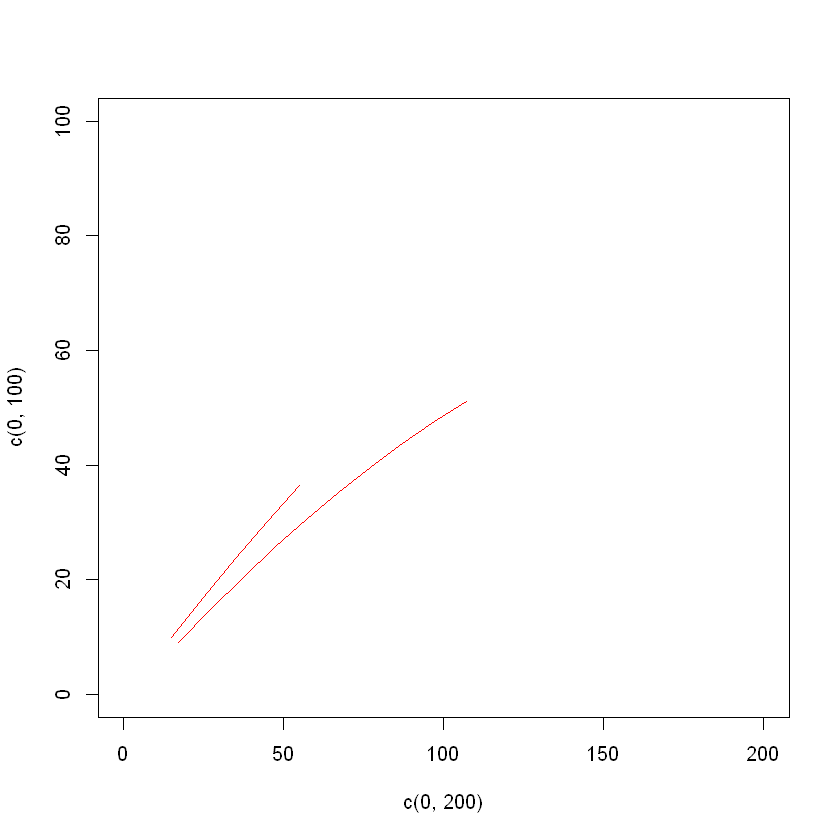

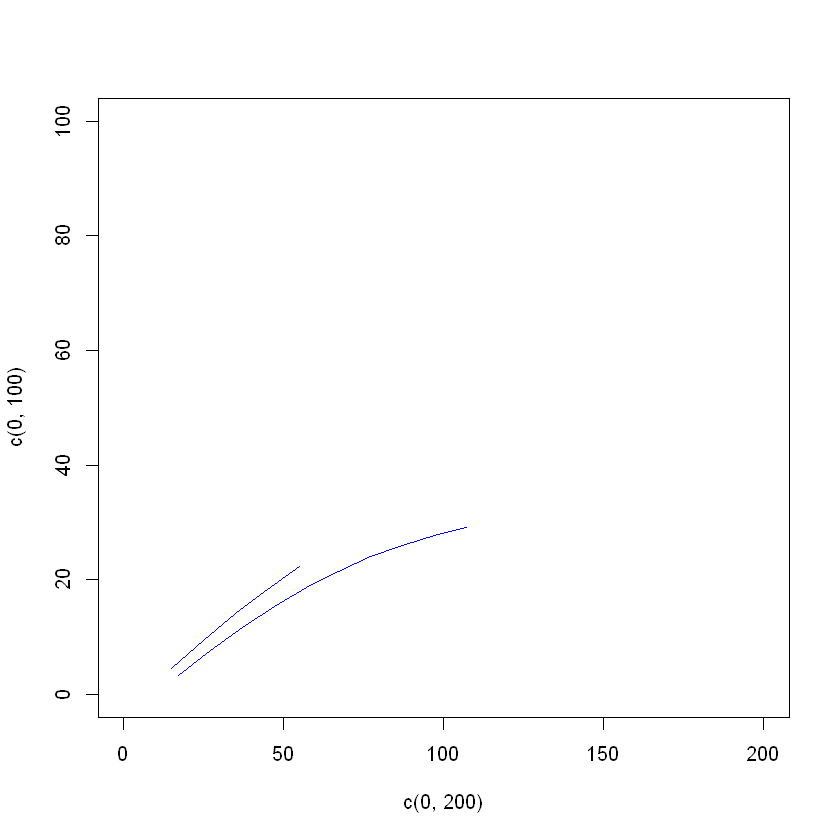

In [8]:
## a)

model<-lmer(y ~ -1 + variable + variable:(Age+I(Age^2)) + (-1+variable+variable:Age|Tree.ID), data=dd)
summary(model)
fixef(model)
B<-matrix(fixef(model), nrow=3,ncol=2, by=1)

#           [,1]         [,2]
# [1,] -5.241214605 -4.665141212
# [2,]  0.744258452  0.632296618
# [3,] -0.001380702 -0.001945518

ranef(model)

pred<-predict(model, newdata=dd)

plot(c(0,200), c(0,100), type="n")
lines(dd$Age[Tree.ID==1][1:5],pred[Tree.ID==1][1:5], col="red")
lines(dd$Age[Tree.ID==2][1:10],pred[Tree.ID==2][1:10], col="red")

plot(c(0,200), c(0,100), type="n")
lines(dd$Age[Tree.ID==1][6:10],pred[Tree.ID==1][6:10], col="blue")
lines(dd$Age[Tree.ID==2][11:20],pred[Tree.ID==2][11:20], col="blue")

In [9]:
## b)

n<-dim(Y)[1]
X<-model.matrix(model)
head(X)

E<-matrix(residuals(model), nrow=dim(Y)[1], ncol=2, by=2)
Sigma<-t(E)%*%E/(n-3)
Sigma

#         [,1]      [,2]
# [1,] 2.0403088 0.7825632
# [2,] 0.7825632 2.0171253

diag(diag(Sigma)^{-0.5})%*%Sigma%*%diag(diag(Sigma)^{-0.5})

,variabledbhib.cm,variableheight.m,variabledbhib.cm:Age,variableheight.m:Age,variabledbhib.cm:I(Age^2),variableheight.m:I(Age^2)
1,1,0,55,0,3025,0
2,1,0,45,0,2025,0
3,1,0,35,0,1225,0
4,1,0,25,0,625,0
5,1,0,15,0,225,0
6,1,0,107,0,11449,0


2.0403088,0.7825632
0.7825632,2.0171253


1.0000000,0.3857492
0.3857492,1.0000000


In [10]:
## c)

newdata<-data.frame(variable=c("dbhib.cm", "height.m"), Age=97, Tree.ID=67)
muf<-predict(model, newdata=newdata, re.form=NA) # estimate-we consider only the fixed effects
#     1        2 
# 53.96083 38.36225 

yfhat<-predict(model, newdata=newdata) # prediction: FE+RE
#   1        2 
# 34.99674 26.78209

yflower.bound<-qnorm(0.1, mean=yfhat, sd=(diag(Sigma)^(0.5)))
yfupper.bound<-qnorm(0.9, mean=yfhat, sd=(diag(Sigma)^(0.5)))

rbind(yflower.bound,yfhat,yfupper.bound)

#                   1        2
# yflower.bound 33.16618 24.96196
# yfhat         34.99674 26.78209
# yfupper.bound 36.82730 28.60222


,1,2
yflower.bound,33.16618,24.96196
yfhat,34.99674,26.78209
yfupper.bound,36.82730,28.60222


In [11]:
### d)

y1f<-c(35.5)
Sigma11<-Sigma[1,1]
Sigma12<-Sigma[1,2]
Sigma21<-Sigma[2,1]
Sigma22<-Sigma[2,2]

BP<-yfhat[2]+Sigma21%*%solve(Sigma11)%*%(y1f-yfhat[1]) # point prediction
# 26.97512

cov.error<-Sigma22-Sigma21%*%solve(Sigma11)%*%Sigma12

lower.bound<-BP-qnorm(0.9)*diag(cov.error)^0.5
upper.bound<-BP+qnorm(0.9)*diag(cov.error)^0.5
lower.bound
upper.bound

# > lower.bound
# [,1]
# [1,] 25.29586
# > upper.bound
# [,1]
# [1,] 28.65438


25.29586


28.65438
